In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd
import numpy as np 
from numpy.core.defchararray import add

In [22]:
df = pd.read_csv("drive/MyDrive/dami/fraud_detection_train.csv")

In [23]:
# melihat ukuran data
df.shape

(200217, 53)

In [24]:
# melihat type atribut
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200217 entries, 0 to 200216
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   visit_id       200217 non-null  int64 
 1   kdkc           200217 non-null  int64 
 2   dati2          200217 non-null  int64 
 3   typeppk        200217 non-null  object
 4   jkpst          200217 non-null  object
 5   umur           200217 non-null  int64 
 6   jnspelsep      200217 non-null  int64 
 7   los            200217 non-null  int64 
 8   cmg            200217 non-null  object
 9   severitylevel  200217 non-null  int64 
 10  diagprimer     200217 non-null  object
 11  dx2_a00_b99    200217 non-null  int64 
 12  dx2_c00_d48    200217 non-null  int64 
 13  dx2_d50_d89    200217 non-null  int64 
 14  dx2_e00_e90    200217 non-null  int64 
 15  dx2_f00_f99    200217 non-null  int64 
 16  dx2_g00_g99    200217 non-null  int64 
 17  dx2_h00_h59    200217 non-null  int64 
 18  dx2_

In [25]:
df.head()

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,diagprimer,dx2_a00_b99,dx2_c00_d48,dx2_d50_d89,dx2_e00_e90,dx2_f00_f99,dx2_g00_g99,dx2_h00_h59,dx2_h60_h95,dx2_i00_i99,dx2_j00_j99,dx2_koo_k93,dx2_l00_l99,dx2_m00_m99,dx2_n00_n99,dx2_o00_o99,dx2_p00_p96,dx2_q00_q99,dx2_r00_r99,dx2_s00_t98,dx2_u00_u99,dx2_v01_y98,dx2_z00_z99,proc00_13,proc14_23,proc24_27,proc28_28,proc29_31,proc_32_38,proc39_45,proc46_51,proc52_57,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
0,1,1107,150,SB,P,64,2,0,F,0,f00_f99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1303,200,C,L,45,1,9,E,3,e00_e90,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1
2,3,1114,172,B,P,34,2,0,Q,0,r00_r99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,601,90,SC,L,34,2,0,Q,0,r00_r99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,1006,130,B,L,27,2,0,F,0,f00_f99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [26]:
# checking missing value
df.isna()

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,diagprimer,dx2_a00_b99,dx2_c00_d48,dx2_d50_d89,dx2_e00_e90,dx2_f00_f99,dx2_g00_g99,dx2_h00_h59,dx2_h60_h95,dx2_i00_i99,dx2_j00_j99,dx2_koo_k93,dx2_l00_l99,dx2_m00_m99,dx2_n00_n99,dx2_o00_o99,dx2_p00_p96,dx2_q00_q99,dx2_r00_r99,dx2_s00_t98,dx2_u00_u99,dx2_v01_y98,dx2_z00_z99,proc00_13,proc14_23,proc24_27,proc28_28,proc29_31,proc_32_38,proc39_45,proc46_51,proc52_57,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200212,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
200213,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
200214,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
200215,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
# check missing value
df.isna().sum

<bound method DataFrame.sum of         visit_id   kdkc  dati2  ...  proce00_e99  procv00_v89  label
0          False  False  False  ...        False        False  False
1          False  False  False  ...        False        False  False
2          False  False  False  ...        False        False  False
3          False  False  False  ...        False        False  False
4          False  False  False  ...        False        False  False
...          ...    ...    ...  ...          ...          ...    ...
200212     False  False  False  ...        False        False  False
200213     False  False  False  ...        False        False  False
200214     False  False  False  ...        False        False  False
200215     False  False  False  ...        False        False  False
200216     False  False  False  ...        False        False  False

[200217 rows x 53 columns]>

In [28]:
df.drop(['visit_id'], axis=1, inplace=True)

In [29]:
df['jkpst'].replace(to_replace=['L', 'P'], value =[0, 1], inplace=True)

In [30]:
from numpy.core.defchararray import add
# bpjs_data with numeric data type
data_num = df.select_dtypes(include=[np.number])

# bpjs_data with category data type
data_cat = df.select_dtypes(exclude=[np.number])

# Get dummies (data transformation)
transform_cat = pd.get_dummies(data_cat, prefix_sep='_', drop_first=True)

In [31]:
data_cat = transform_cat.assign(new=add('', np.arange(1, len(data_cat) + 1).astype(str)))
data_num = data_num.assign(new=add('', np.arange(1, len(data_num) + 1).astype(str)))
bpjs_data_final = pd.concat([data_cat, data_num], axis=1)
bpjs_data_final.drop(['new'], axis=1, inplace=True)

In [32]:
bpjs_data_final

,typeppk_B,typeppk_C,typeppk_D,typeppk_GD,typeppk_HD,typeppk_I1,typeppk_I2,typeppk_I3,typeppk_I4,typeppk_KB,typeppk_KC,typeppk_KG,typeppk_KI,typeppk_KJ,typeppk_KL,typeppk_KM,typeppk_KO,typeppk_KP,typeppk_KT,typeppk_KU,typeppk_SA,typeppk_SB,typeppk_SC,typeppk_SD,cmg_B,cmg_C,cmg_D,cmg_E,cmg_F,cmg_G,cmg_H,cmg_I,cmg_J,cmg_K,cmg_L,cmg_M,cmg_N,cmg_O,cmg_P,cmg_Q,...,dx2_d50_d89,dx2_e00_e90,dx2_f00_f99,dx2_g00_g99,dx2_h00_h59,dx2_h60_h95,dx2_i00_i99,dx2_j00_j99,dx2_koo_k93,dx2_l00_l99,dx2_m00_m99,dx2_n00_n99,dx2_o00_o99,dx2_p00_p96,dx2_q00_q99,dx2_r00_r99,dx2_s00_t98,dx2_u00_u99,dx2_v01_y98,dx2_z00_z99,proc00_13,proc14_23,proc24_27,proc28_28,proc29_31,proc_32_38,proc39_45,proc46_51,proc52_57,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200212,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
200213,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
200214,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
200215,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [33]:
# split features (X) and label (y)
X = bpjs_data_final.iloc[:,:-1].values
y = bpjs_data_final.iloc[:, -1].values

In [34]:
#i. Normalisasi
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler(feature_range=(0, 1)).fit_transform(X)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold 
from sklearn.feature_selection import SelectKBest, chi2, f_regression
X_new=SelectKBest(score_func=chi2,k=5).fit_transform(X,y)
X_new

array([[0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [36]:
#i.Lakukanla pembagian data: training data (80%) dan testing data (20%).
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 0)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import  StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef
MCC_scorer = make_scorer(matthews_corrcoef)
pipeline_rf = Pipeline([
                ( 'model', RandomForestClassifier(n_jobs=-1, random_state=1))
])
param_grid_rf = {'model__n_estimators': [75]}
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, scoring=MCC_scorer,
                       n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [38]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1, param_grid={'model__n_estimators': [75]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [39]:
grid_rf.best_score_

0.08959021437334048

In [40]:
grid_rf.best_params_

{'model__n_estimators': 75}

In [41]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [42]:
def classification_eval(estimator, X_test, y_test):
    """
    Print several metrics of classification performance of an estimator, given features X_test and true labels y_test.
    
    Input: estimator or GridSearchCV instance, X_test, y_test
    Returns: text printout of metrics
    """
    y_pred = estimator.predict(X_test)
    
    # Number of decimal places based on number of samples
    dec = np.int64(np.ceil(np.log10(len(y_test))))
    
    print('CONFUSION MATRIX')
    print(confusion_matrix(y_test, y_pred), '\n')
    
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test, y_pred, digits=dec))
    
    print('SCALAR METRICS')
    format_str = '%%13s = %%.%if' % dec
    print(format_str % ('MCC', matthews_corrcoef(y_test, y_pred)))
    if y_test.nunique() <= 2: # Additional metrics for binary classification
        try:
            y_score = estimator.predict_proba(X_test)[:,1]
        except:
            y_score = estimator.decision_function(X_test)
        print(format_str % ('AUPRC', average_precision_score(y_test, y_score)))
        print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))
    print(format_str % ("Cohen's kappa", cohen_kappa_score(y_test, y_pred)))
    print(format_str % ('Accuracy', accuracy_score(y_test, y_pred)))

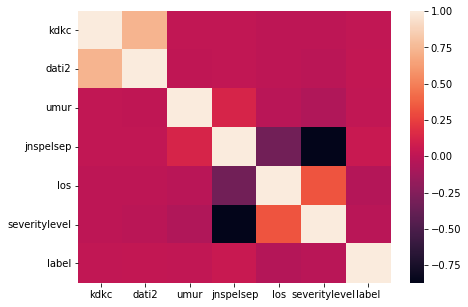

In [49]:
## Tampilkanla correlation heatmap 
import matplotlib.pyplot as plt
import seaborn as sns

atribut = ['kdkc', 'dati2',  'umur', 'jnspelsep', 'los', 'severitylevel', 'label']
correlations = bpjs_data_final[atribut].corr()

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(correlations, ax = ax);